# ARMA Order Determination

The $\text{ARMA}(p,q)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \vartheta_i \varepsilon_{t-i-1}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

Typically a time series is either $\text{AR}(p)$ or $\text{MA}(q)$. When calibrating a time series to an $\text{AR}(p)$</br>
or $\text{MA}(q)$ process a method is needed to determine the values of $p$ and $q$. For an $\text{MA}(q)$ process</br>
the autocorrelation function (ACF) is used. The ACF is defined by,

$
\begin{align}
\rho_\tau = \frac{\text{E}[X_t X_{t+\tau}]}{\text{E}[X_t^2]}
\end{align}
$

For values of $\tau > q$ the ACF is zero for an $\text{MA}(q)$ process.

Similarly, for an $\text{AR}(p)$ process the partial autocorrelation function (PACF) is used. The PACF</br> 
is computed using the Yule-Walker equations. Recall that the Yule-Walker equations relate the autocorrelation</br>
function to the $\text{AR}(p)$ coefficients $\varphi_i$. Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{p-1} \\
\rho_{p}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{p-1} \\
\varphi_{p}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{p-2} & \rho_{p-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{p-3} & \rho_{p-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{p-4} & \rho_{p-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{p-2} & \rho_{p-3} & \rho_{p-4} & \cdots & 1 & \rho_1 \\
\rho_{p-1} & \rho_{p-2} & \rho_{p-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

So, the partial autocorrelation function, PACF, is given by,

$
\begin{align}
\hat{R}^{-1} \hat{r}
\end{align}
$

For lags grater than the time series order $p$ the PACF is zero.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
σ = 1
nsample = 1000
nlags = 10

## $\text{AR}(p)$

### AR(1) Simulations

In [3]:
φ1 = numpy.array([0.8])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.5])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2])
ar3 = arima.arp(φ3, nsample)

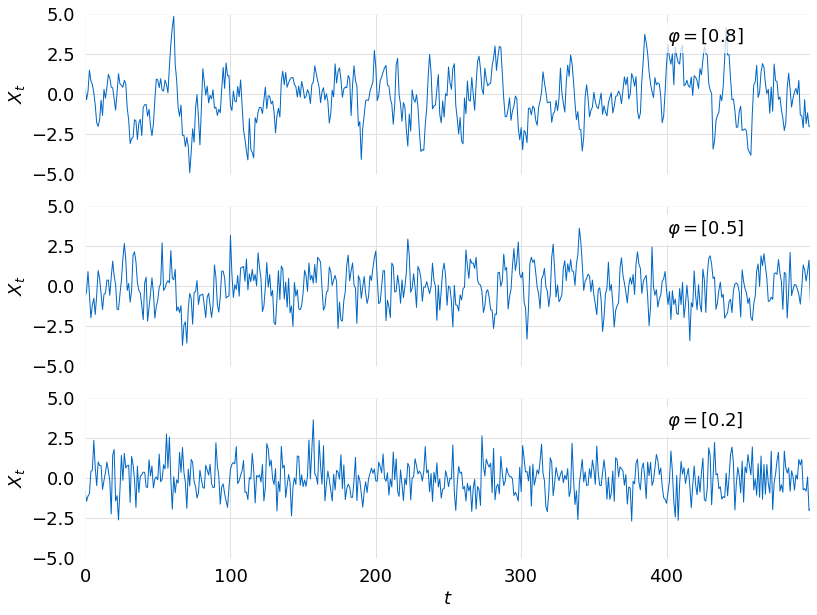

In [4]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(1) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels)

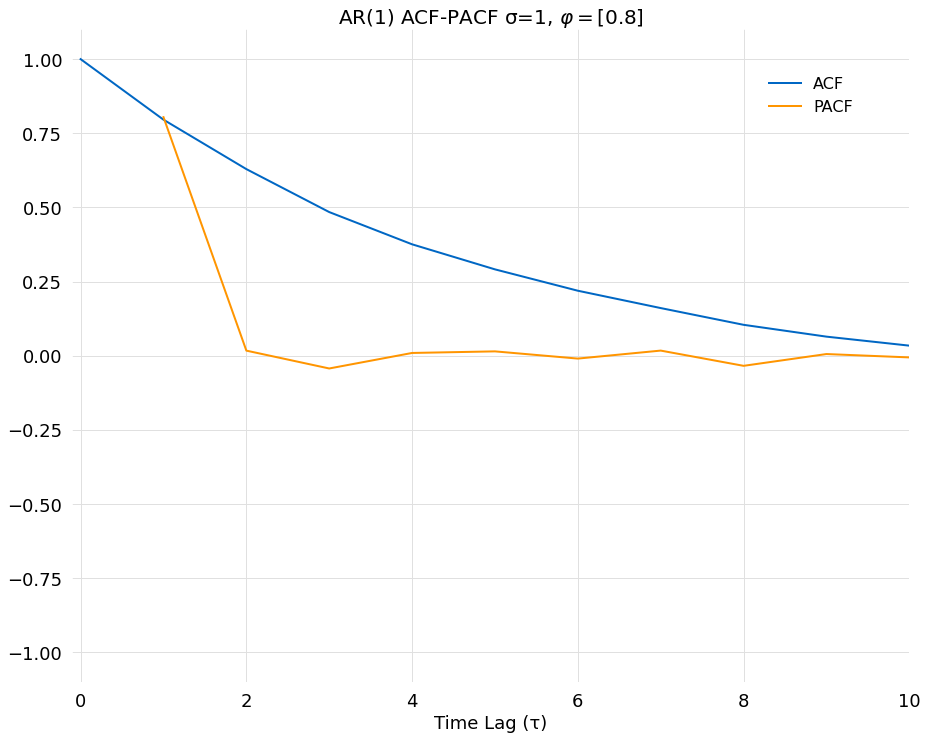

In [5]:
acf = stats.acf(ar1, nlags)
pacf = arima.yw(ar1, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

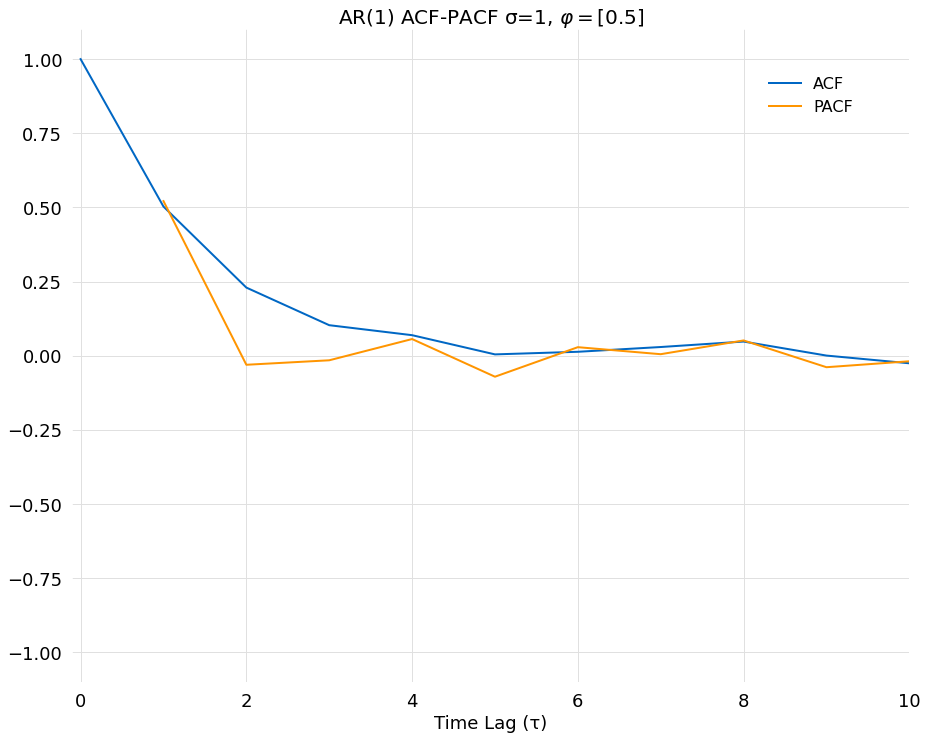

In [6]:
acf = stats.acf(ar2, nlags)
pacf = arima.yw(ar2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

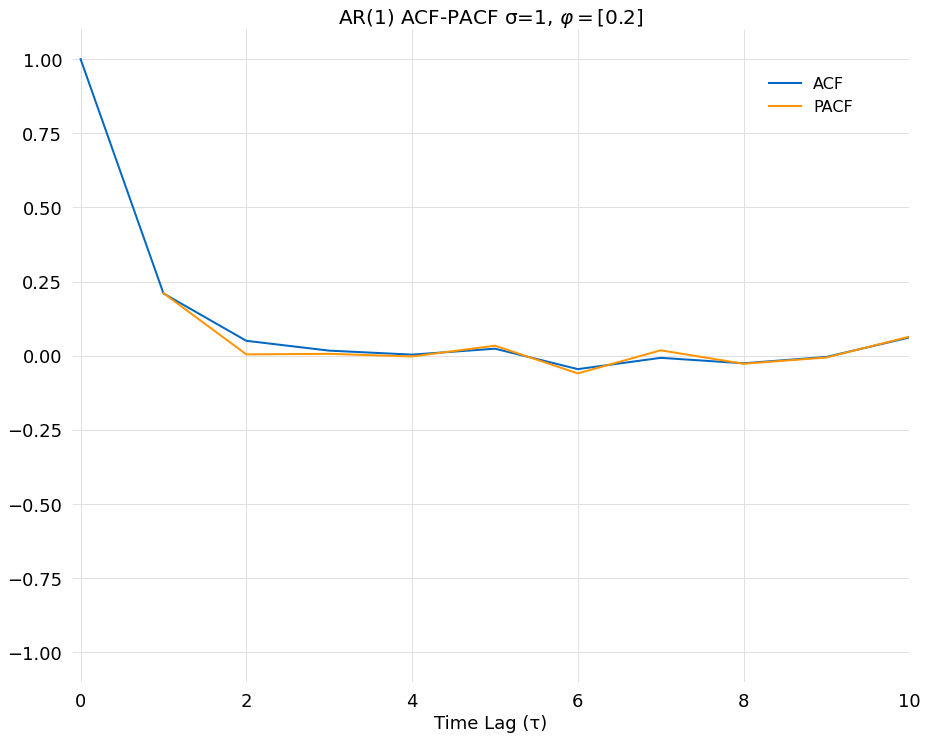

In [7]:
acf = stats.acf(ar3, nlags)
pacf = arima.yw(ar3, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

In [8]:
φ1 = numpy.array([-0.8])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([-0.5])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([-0.2])
ar3 = arima.arp(φ3, nsample)

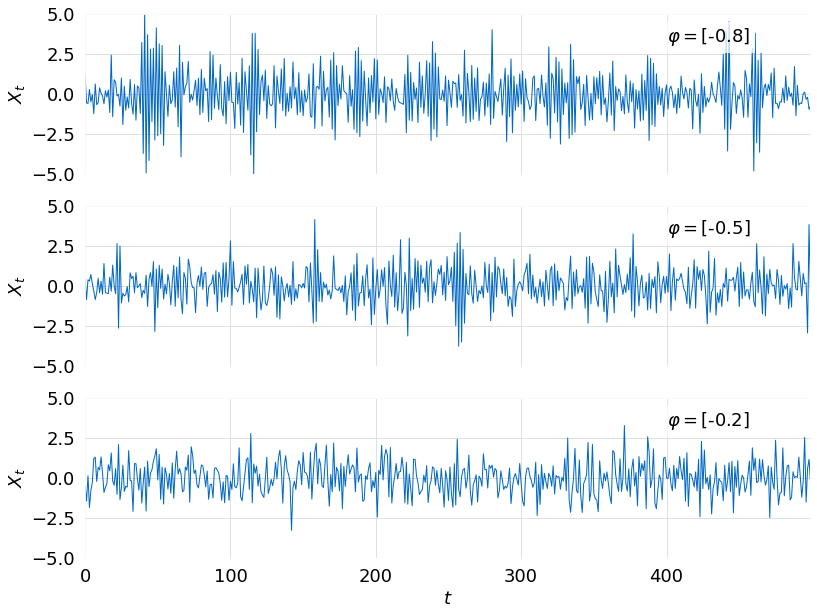

In [9]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(1) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels)

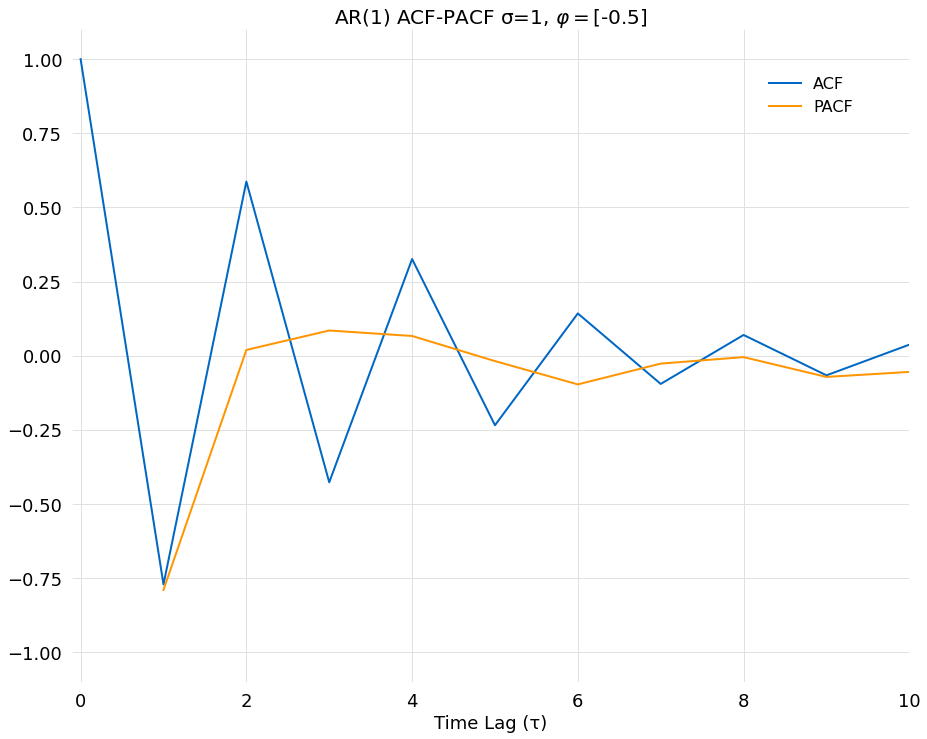

In [10]:
acf = stats.acf(ar1, nlags)
pacf = arima.yw(ar1, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

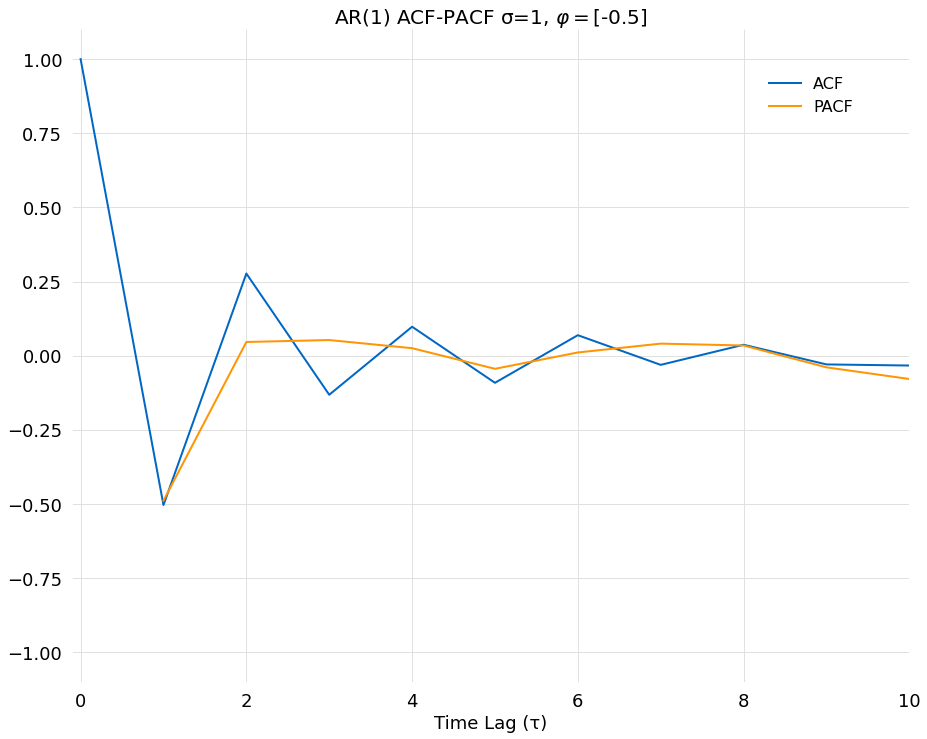

In [11]:
acf = stats.acf(ar2, nlags)
pacf = arima.yw(ar2, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

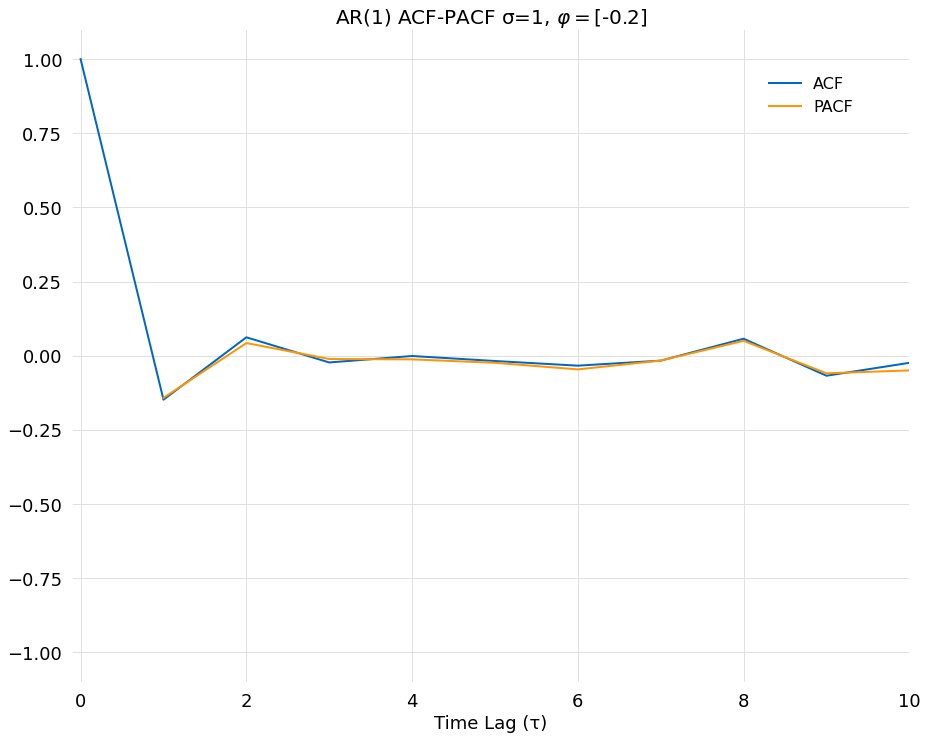

In [12]:
acf = stats.acf(ar3, nlags)
pacf = arima.yw(ar3, nlags)
title = f"AR(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

### AR(2) and AR(3) Simulations

In [13]:
φ1 = numpy.array([0.2, 0.5])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([-0.2, -0.5])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.5, 0.3, 0.1])
ar3 = arima.arp(φ3, nsample)

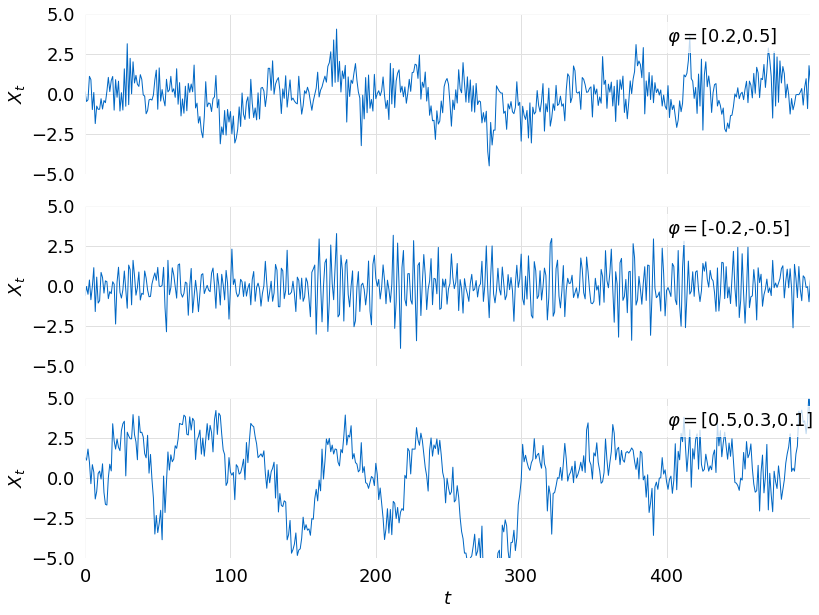

In [14]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(2) and AR(3) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels)

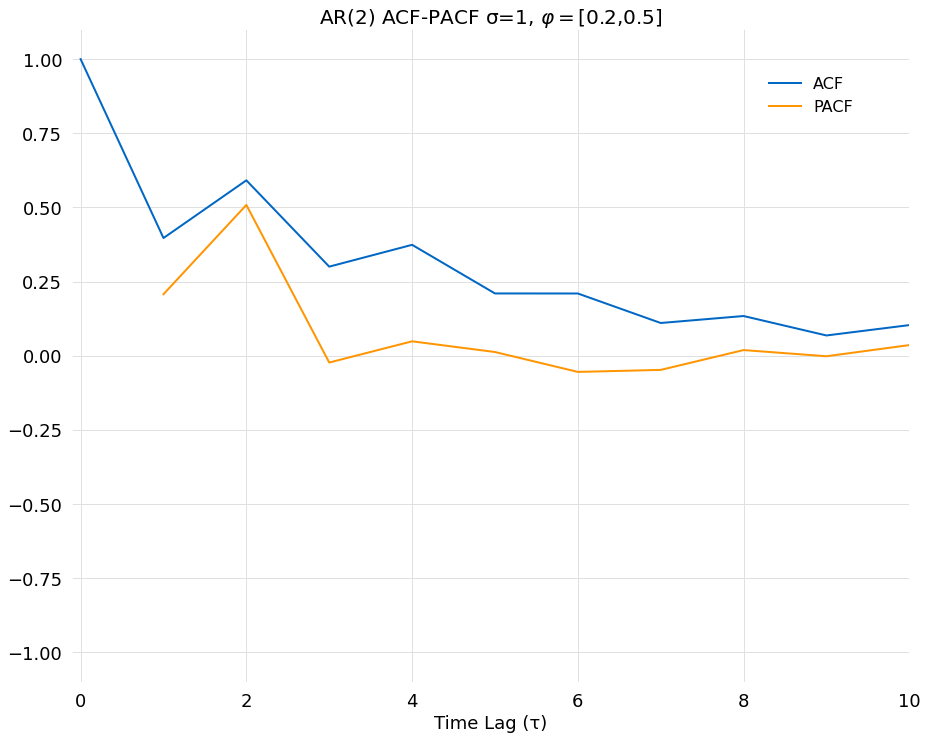

In [15]:
acf = stats.acf(ar1, nlags)
pacf = arima.yw(ar1, nlags)
title = f"AR(2) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

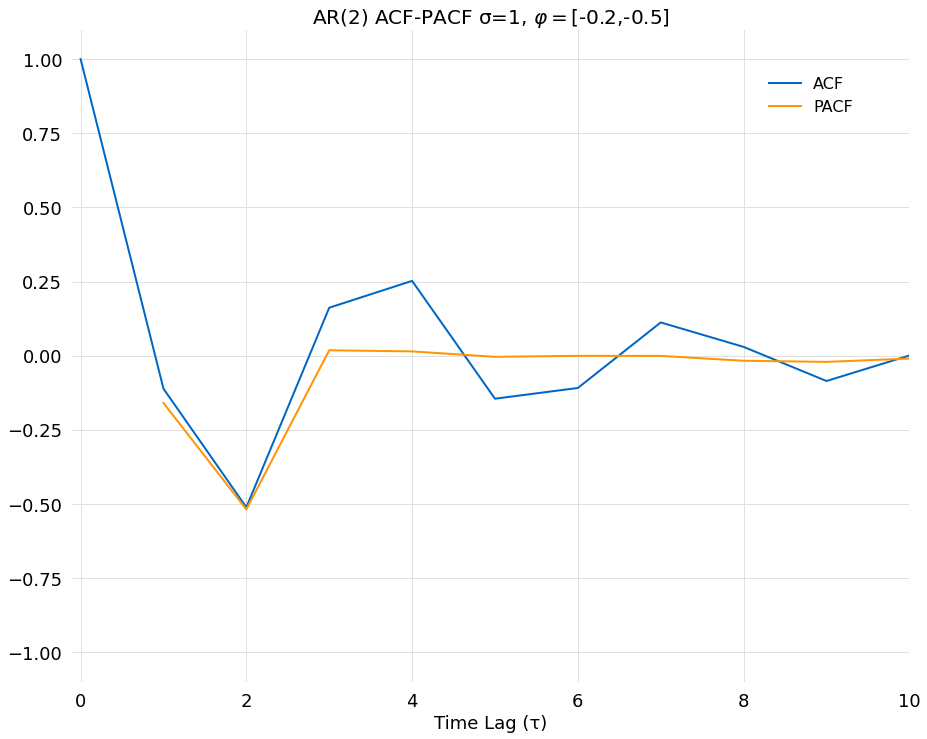

In [16]:
acf = stats.acf(ar2, nlags)
pacf = arima.yw(ar2, nlags)
title = f"AR(2) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

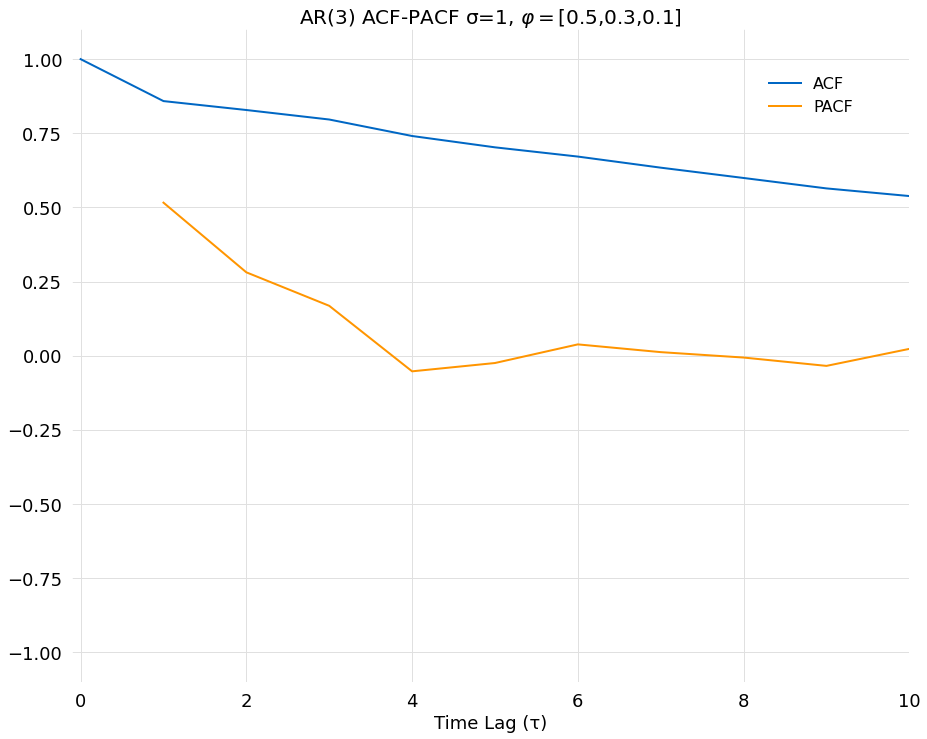

In [17]:
acf = stats.acf(ar3, nlags)
pacf = arima.yw(ar3, nlags)
title = f"AR(3) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

## $\text{MA}(q)$

### MA(1) Simulations

In [18]:
θ1 = numpy.array([0.8])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([0.5])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2])
ma3 = arima.maq(θ3, nsample)

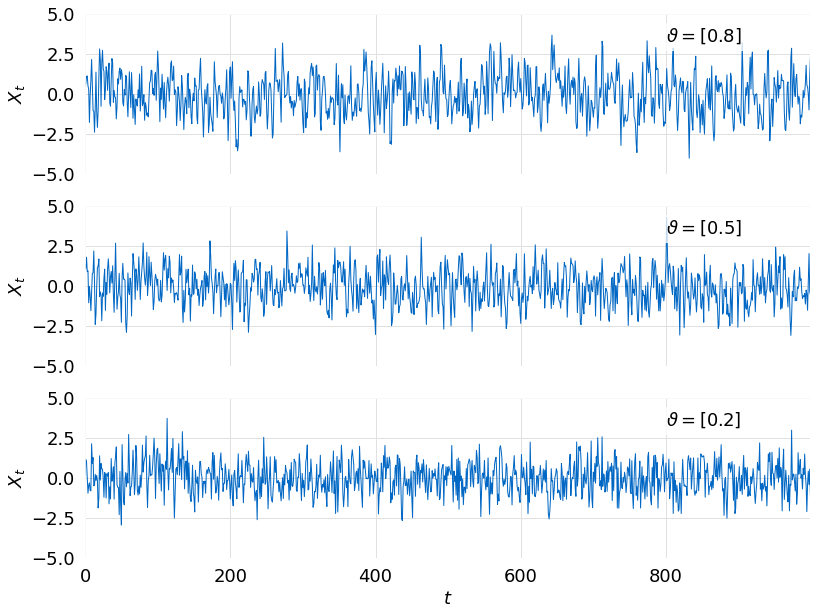

In [19]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(1) Comparison"
samples = [ma1, ma2, ma3]
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels)

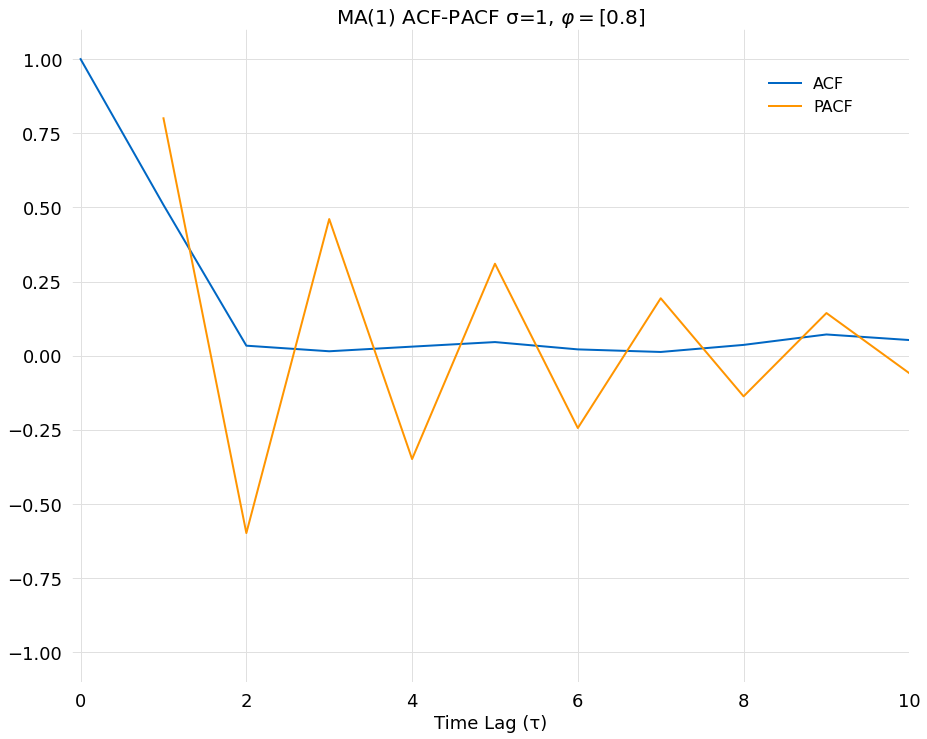

In [20]:
acf = stats.acf(ma1, nlags)
pacf = arima.yw(ma1, nlags)
title = f"MA(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

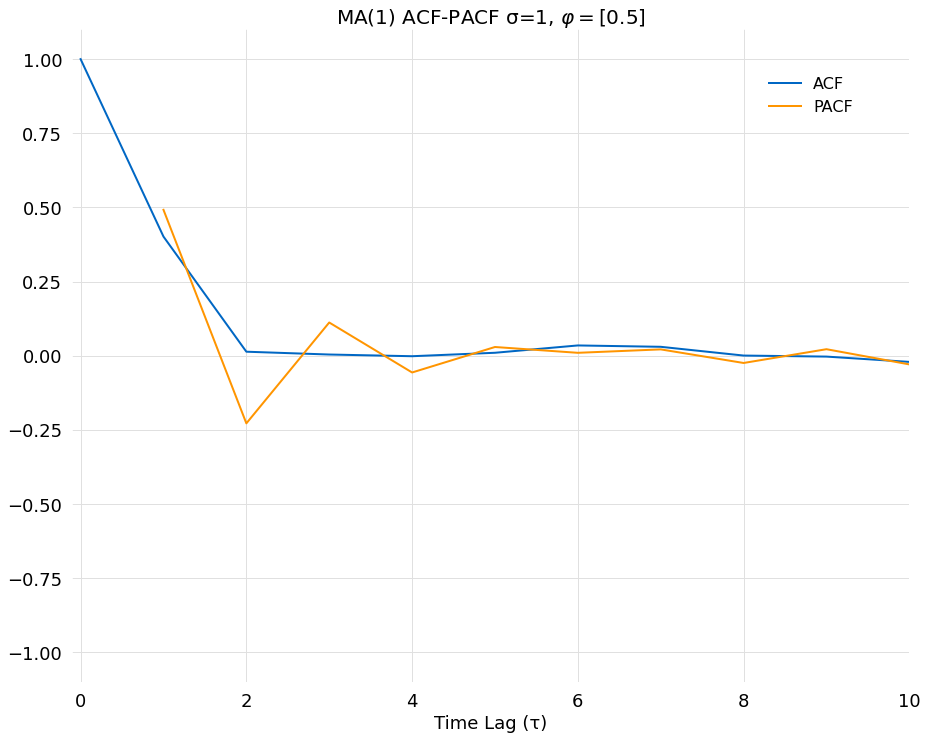

In [21]:
acf = stats.acf(ma2, nlags)
pacf = arima.yw(ma2, nlags)
title = f"MA(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

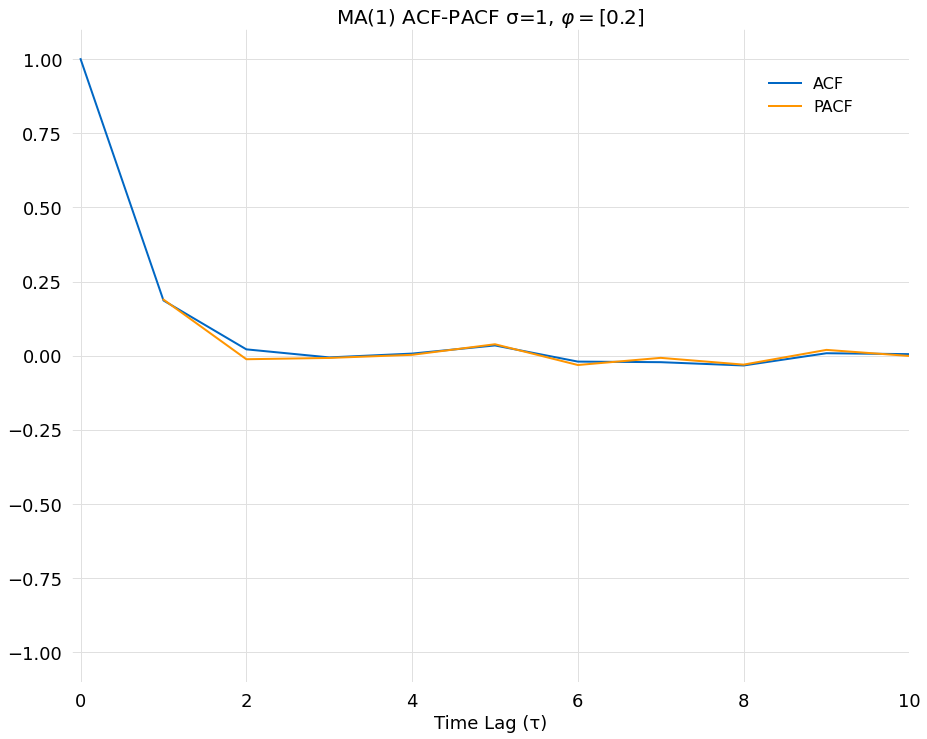

In [22]:
acf = stats.acf(ma3, nlags)
pacf = arima.yw(ma3, nlags)
title = f"MA(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

In [23]:
θ1 = numpy.array([-0.8])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([-0.5])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([-0.2])
ma3 = arima.maq(θ3, nsample)

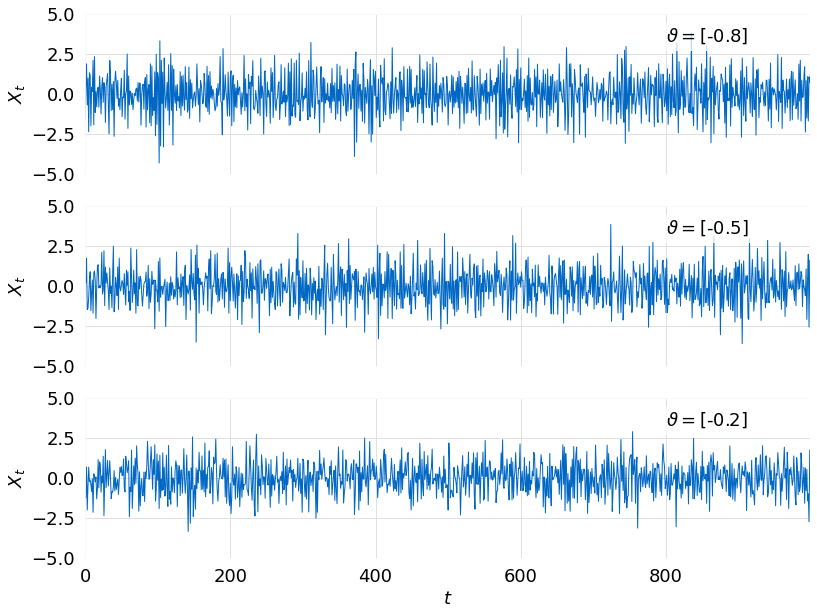

In [24]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(1) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels)

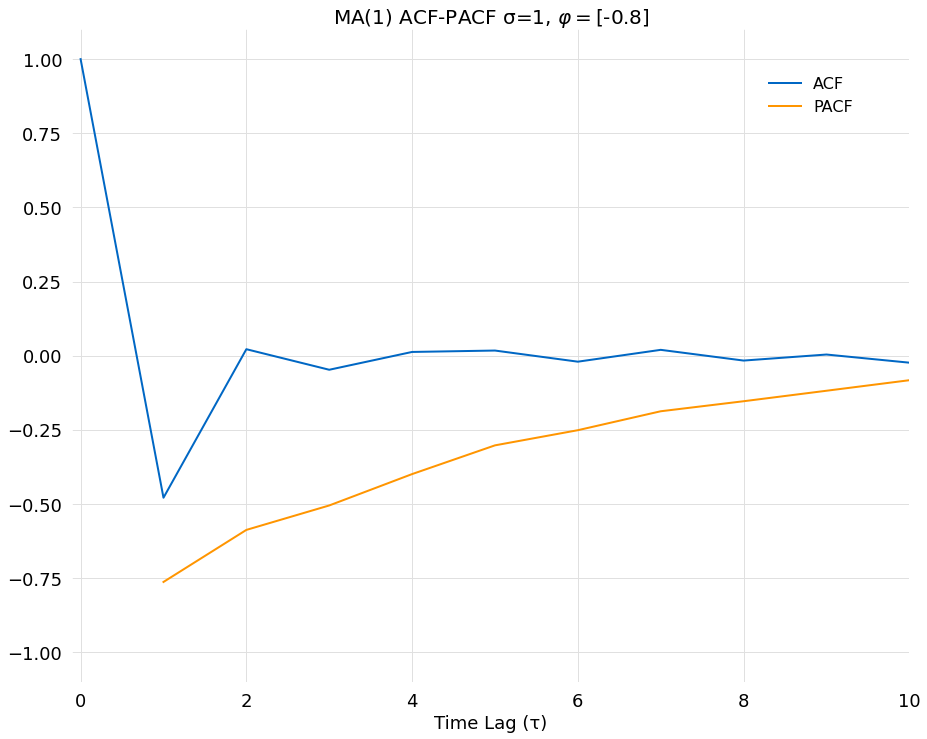

In [25]:
acf = stats.acf(ma1, nlags)
pacf = arima.yw(ma1, nlags)
title = f"MA(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

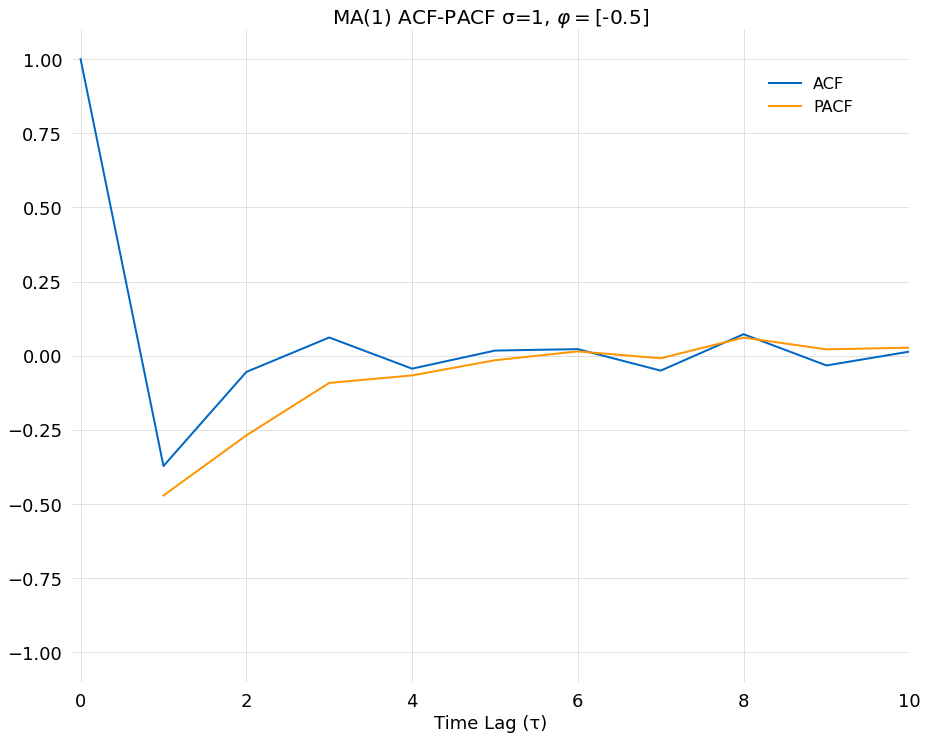

In [26]:
acf = stats.acf(ma2, nlags)
pacf = arima.yw(ma2, nlags)
title = f"MA(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

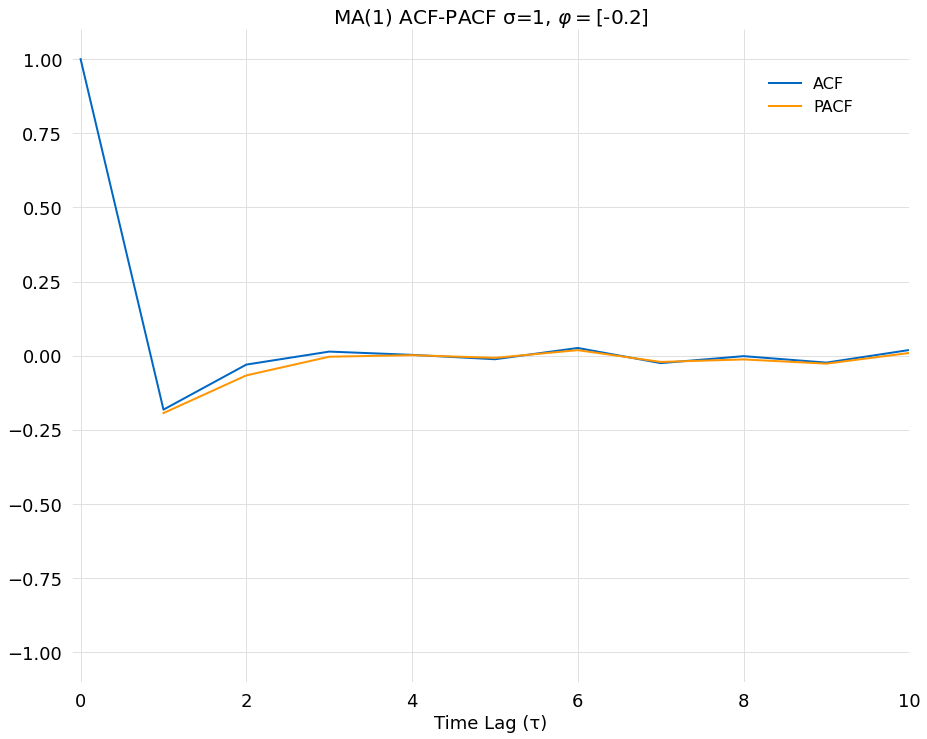

In [27]:
acf = stats.acf(ma3, nlags)
pacf = arima.yw(ma3, nlags)
title = f"MA(1) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

### MA(2) and MA(3) Simulations

In [28]:
θ1 = numpy.array([0.3, 0.4])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([-0.3, -0.4])
ma2 = arima.maq(θ2, nsample, σ)

θ3 = numpy.array([0.2, 0.3, 0.2])
ma3 = arima.maq(θ3, nsample)

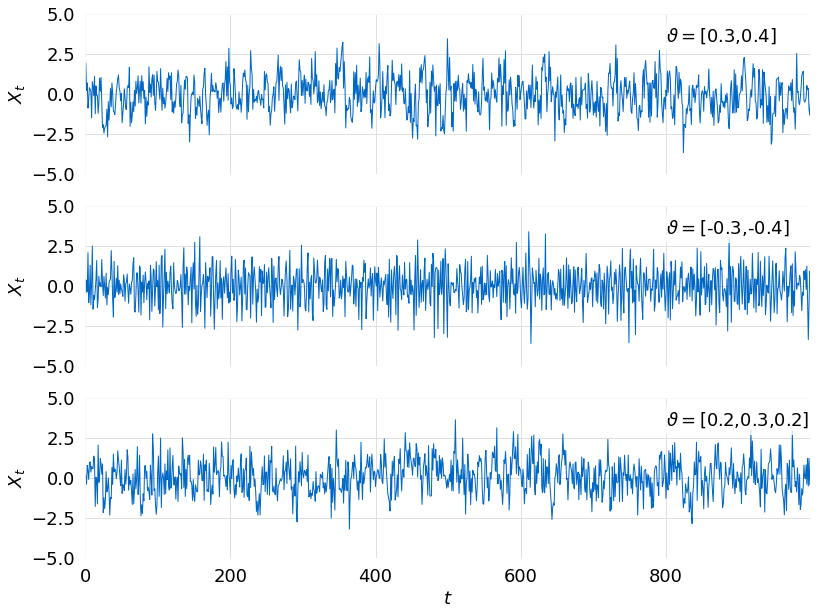

In [29]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(2) and MA(3) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.stack(samples, [-5.0, 5.0], title=title, labels=labels)

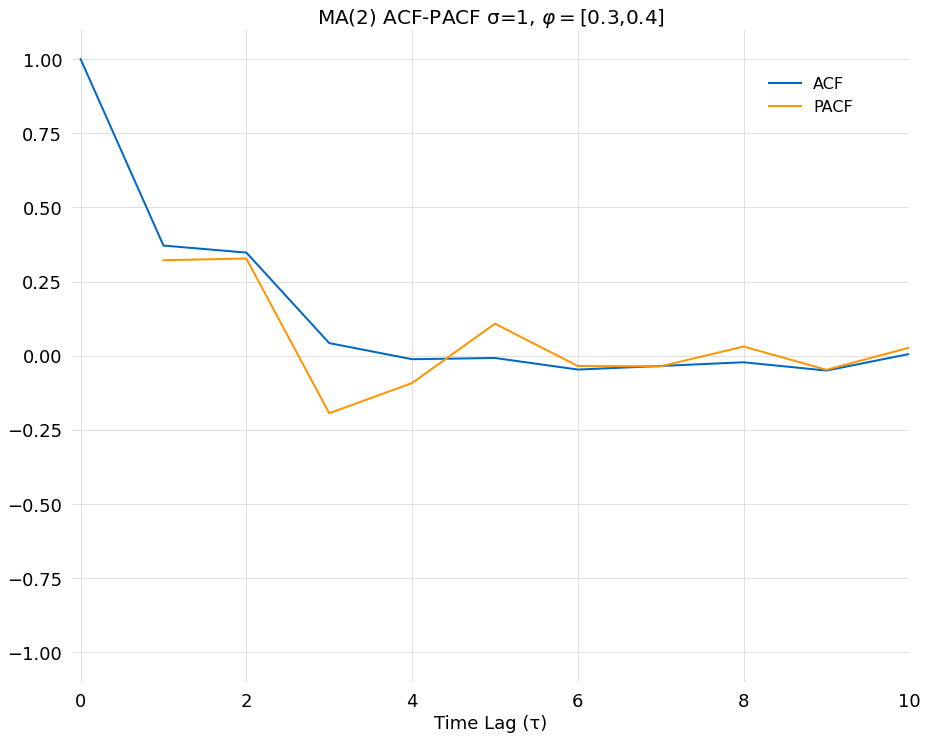

In [30]:
acf = stats.acf(ma1, nlags)
pacf = arima.yw(ma1, nlags)
title = f"MA(2) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

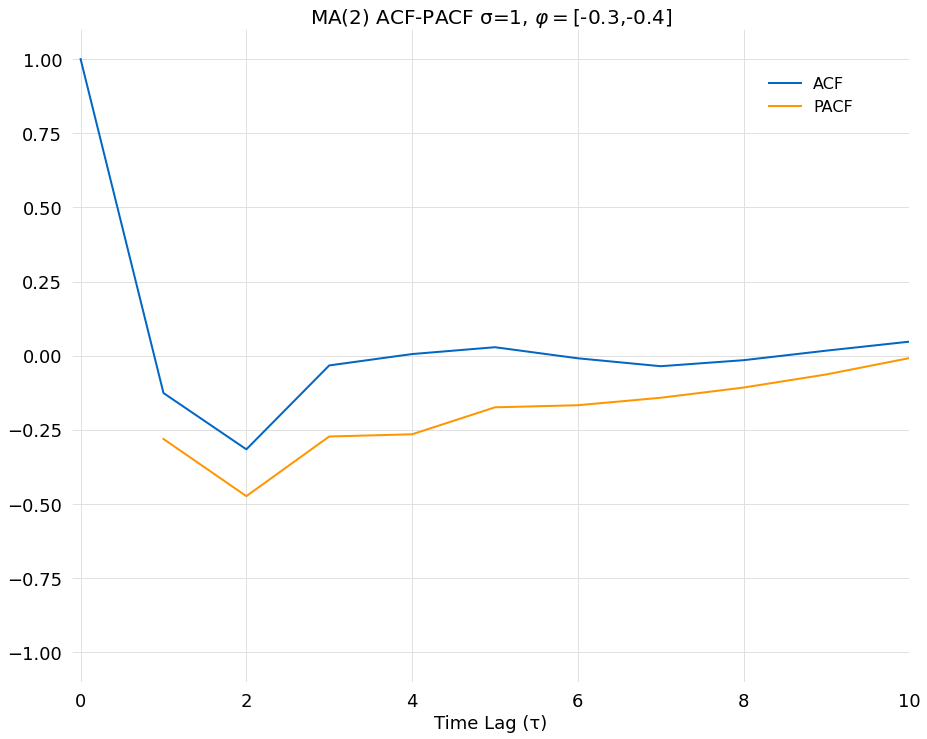

In [31]:
acf = stats.acf(ma2, nlags)
pacf = arima.yw(ma2, nlags)
title = f"MA(2) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)

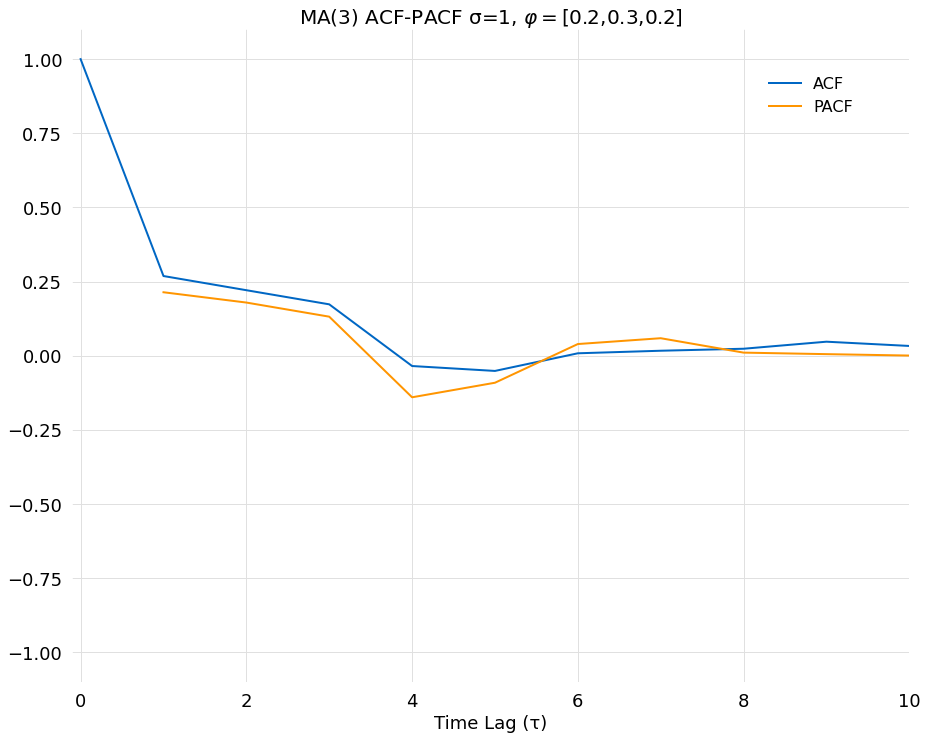

In [32]:
acf = stats.acf(ma3, nlags)
pacf = arima.yw(ma3, nlags)
title = f"MA(3) ACF-PACF σ={σ}, " + r"$\varphi=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"
plots.acf_pacf(title, acf, pacf, nlags)